## Malla básica

Para crear una malla, lo primero es crear todos sus nodos

supongamos que queremos una malla que va desde 0 a 10 en x con 11 nodos y lo mismo en y

El total de nodos para una malla con $nx \times ny $ nodos es:
$$ N_{nodos}=nx\times ny$$

en este caso $ 11\times 11 =121$

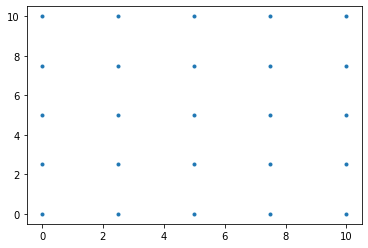

In [123]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

xmin, xmax,ymin, ymax, nx, ny = 0, 10, 0, 10, 5, 5
x = linspace(xmin, xmax, nx)
y = linspace(ymin, ymax, ny)
xv, yv = meshgrid(x, y)
points = array([xv.flatten(),yv.flatten()]).T

plt.plot(points[:,0], points[:,1],'.' )
plt.show()

In [68]:
points[2+1*nx]

array([5. , 2.5])

El total de elementos está dado por:

$$ n_{elementos}=(nx-1)\times(ny-1)\times 2 $$

En este caso, serán $(11-1)\times(11-1)\times 2=200$

In [5]:
nElem=(nx-1)*(ny-1)*2
T= zeros([nElem,3])                          # matriz para de conectividad cada fila tiene los tres nodos de un elemento
nElem

32

Para crear la conectividad que define cada elemento
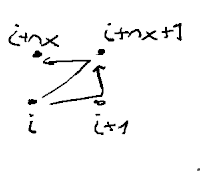

In [6]:
e=0;                                        # índice del elemento
for f in range(0, ny-1):                  # para cada fila excepto la última
    for nodo in range(0, nx-1):              # para cada nodo de la fila excepto el último
        i= nodo+nx*f                       # índice del nodo
        T[e,:]=[i, i+1 , i+nx+1]
        e+=1
        T[e,:]=[i, i+nx+1, i+nx]
        e+=1            
e                                             # verificamos el número total de elementos completados

32

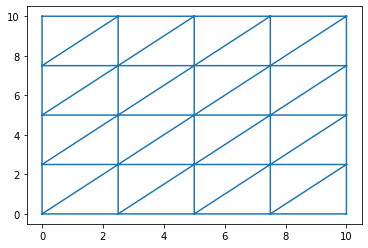

In [76]:
plt.triplot(points[:,0], points[:,1], T.copy())

Sin embargo en esa malla dos elementos (en verde) cuyos nodos están todos en el borde. Esto en muchos casos es indeseable, por ejemplo si se fijan condiciones de contorno en todos los nodos exteriores, esos nodos no n hay conexión con el resto de la malla. Por lo que hay 4 elementos que deben ser modificados, 


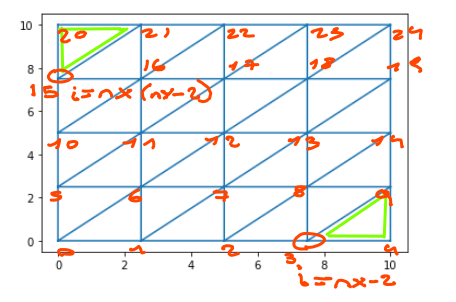
Eestos son los dos últimos creados en la primer fila de nodos
$$ (nx-2)\times 2$$
$$ (nx-2)\times 2 +1 $$


y los dos primeros creados en la anteúltima fila de nodos

$$ (nx-1)\times(ny-2)\times 2 $$
$$ (nx-1)\times(ny-2)\times 2+1 $$


In [124]:
(nx-2)*2, (nx-2)*2+1 ,(nx-1)*(ny-2)*2, (nx-1)*(ny-2)*2+1

(6, 7, 24, 25)

Para los dos dos útlimos nodos de la primer fila empezamos con el nodo  $ i=nx-2 $ y definimos la triangulación
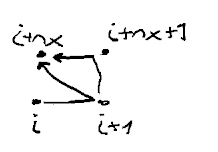

Para los otros dos elementos empezamos con el nodo $ i=nx \times (ny-2) $ y definimos la conectividad de los elementos:

In [10]:
i=nx-2       # verifico los nodos que busco
T[(nx-2)*2+1,:],T[(nx-2)*2+2,:], [i ,  i+1 , i+nx],[i+1, i+1+nx , i+nx]

(array([3., 9., 8.]), array([ 5.,  6., 11.]), [3, 4, 8], [4, 9, 8])

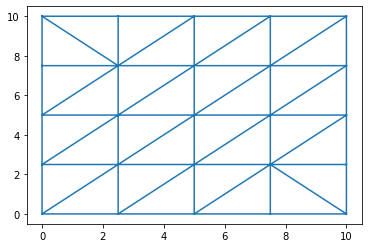

In [12]:
i=nx-2
T[(nx-2)*2+1,:]=[i ,  i+1 , i+nx]
T[(nx-2)*2,:]=[i+1, i+1+nx , i+nx]

i=nx*(ny-2)
T[(nx-1)*(ny-2)*2+1,:] = [i ,  i+1 , i+nx]
T[(nx-1)*(ny-2)*2,:] = [i+1, i+1+nx , i+nx]

plt.triplot(points[:,0], points[:,1], T.copy())

## Encapsulamiento en una función

<IPython.core.display.Javascript object>


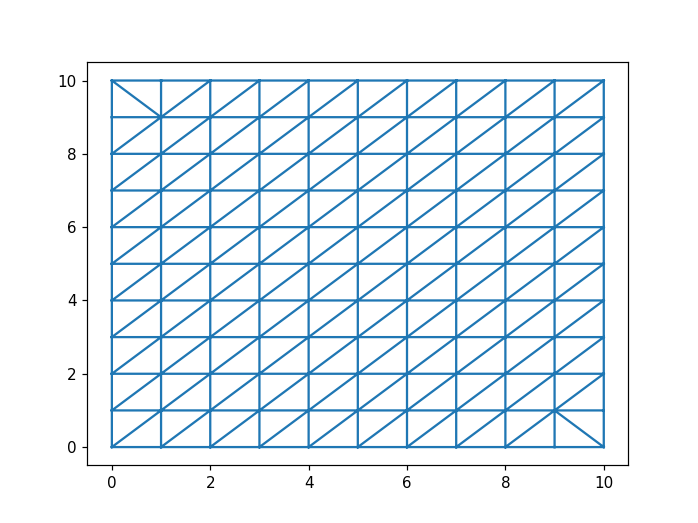

In [50]:
from numpy import *
from matplotlib import pyplot as plt
#%matplotlib inline
%matplotlib notebook
%matplotlib notebook


def malla(xmin, xmax, nx, ymin, ymax, ny, correct_corner=True, plot=False, _3D=True):
    x = linspace(xmin, xmax, nx)
    y = linspace(ymin, ymax, ny)
    xv, yv = meshgrid(x, y)
    points = array([xv.flatten(),yv.flatten()]).T
    
    nElem=(nx-1)*(ny-1)*2
    T= zeros([nElem,3])                          # matriz para de conectividad cada fila tiene los tres nodos de un elemento

    e=0;                                        # índice del elemento
    for f in range(0, ny-1):                  # para cada fila excepto la última
        for nodo in range(0, nx-1):              # para cada nodo de la fila excepto el último
            i= nodo+nx*f                       # índice del nodo
            T[e,:]=[i, i+1 , i+nx+1]
            e+=1
            T[e,:]=[i, i+nx+1, i+nx]
            e+=1   
    
    if(correct_corner):                               # corrige las esquinas 
        i=nx-2                                        # últimos dos elementos de la primer fila
        T[(nx-2)*2+1,:]=[i ,  i+1 , i+nx]
        T[(nx-2)*2,:]=[i+1, i+1+nx , i+nx]

        i=nx*(ny-2)                                   # primeros dos elementos de la última fila
        T[(nx-1)*(ny-2)*2+1,:] = [i ,  i+1 , i+nx]
        T[(nx-1)*(ny-2)*2,:] = [i+1, i+1+nx , i+nx]
    
    if(plot):
        plt.triplot(points[:,0], points[:,1], T.copy())
    
    if(_3D):                                          # agrego una columna de 0 para z
        P3=zeros([len(points),3])
        P3[:,0:2]=points
        return P3, T
    
    return points, T                                  # devuelve los nodos y su conectividad
    
X,T= malla(0,10,11,0,10,11, plot=True)

<IPython.core.display.Javascript object>


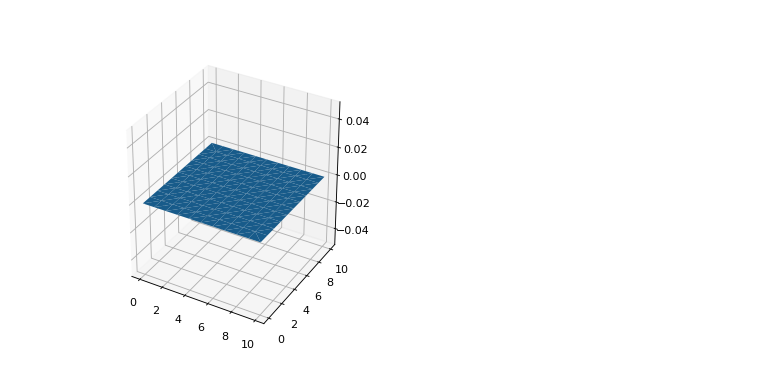

In [5]:
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D 
points,T= malla(0,10,11,0,10,11, _3D=True)
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=T)

## Identificando nodos del borde y esquinas
En muchos casos puede ser útil identificar aquellos nodos de los bordes y de las esquinas... En este caso los identificaremos con una lista de números llamada Creases:

* nodos interiores =0
* nodos de los bordes =1
* nodos de las esquinas  =2

In [51]:
creases=(X[:,0]==0) *1 + (X[:,0]==10 )*1+  (X[:,1]==0)*1+ (X[:,1]==10)*1 
# *1 convierte de boolan a int para sumar sin comparar any o all

creases

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [52]:
#cantidad de elementos internos, bordes, esquinas
count_nonzero(creases == 0),count_nonzero(creases == 1),count_nonzero(creases == 2)

(81, 36, 4)

## Convirtiendo a VTK
Usando la librería PyVista

In [53]:
def toPyVista(X,T):    # devuelve un objeto compatible de pyvista para facilitar las operaciones
    b = zeros((len(T),4))
    b[:,1:4]=T.copy()
    b[:,0]=3*ones([len(T)], dtype=int)
    faces=hstack(b)
    
    import pyvista as pv
    surf = pv.PolyData(X,faces)
    return surf

surf1=toPyVista(X,T)
surf1.save('ej.vtk')    # desde PyVista guarda en VTK

## Desplazamiento

En este caso se desplaza 10 unidades en x

In [54]:
X_=X.copy()
X_[:,0]+=10
surf2=toPyVista(X_,T)
surf2.save('ej2.vtk')

y se junta con la malla anterior

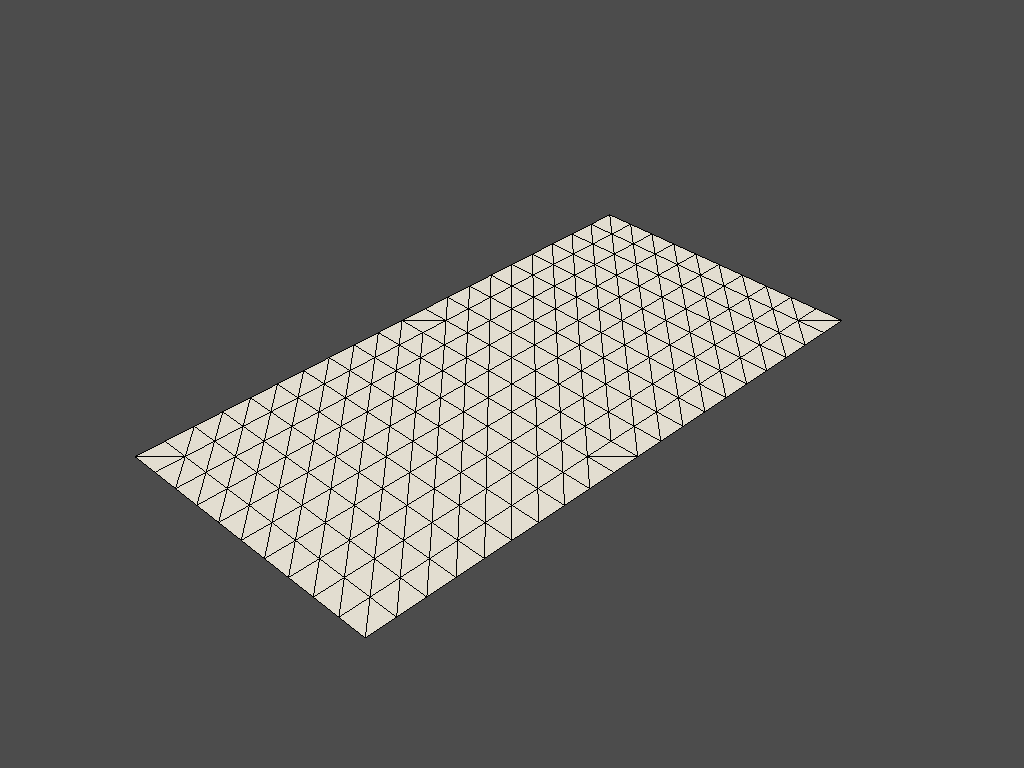

In [55]:
surf=surf1+surf2
surf.plot(show_edges=True)
surf.save('doble.vtk')

In [56]:
P=surf.points
creases=(P[:,0]==0)*1+(P[:,0]==20)*1+(P[:,1]==0)*1+(P[:,1]==10)*1+ (P[:,0]==10)*1
#cantidad de elementos internos, bordes, esquinas
count_nonzero(creases == 0),count_nonzero(creases == 1),count_nonzero(creases == 2)


(162, 72, 8)

In [57]:
import numpy as np
import vtk
from vtk.numpy_interface import dataset_adapter as dsa   # Para convertir de vtk a numpy

reader = vtk.vtkPolyDataReader()                         # SOURCE/READER 
reader.SetFileName('doble.vtk')                   
reader.Update()                                          
data_vtk=reader.GetOutput()
data = dsa.WrapDataObject(data_vtk)                      # convierte la salida a array compatible con numpy

N_points=data.GetNumberOfPoints()                        # número de nodos
Points=np.array(data.Points)                             # nodos

unq, index = np.unique(data.Points,                      # filtro valores uniq del array de puntos
                       axis=0,                           # compara filas enteras
                       return_index=True)                # índice de los no repetidos

master=np.zeros(N_points,dtype=int)
for i in range(0, N_points):                             # para cada nodo i
    if i in index:                                       # si es único
        master[i]=i                                      # su master es i
    else:                                                # si no es único
        for j in range(0,i):                             # comparo con cada nodo anterior  j
            if np.all(Points[i]==Points[j]):             # si es igual  al nodo j (el primero que aparece)
                master[i]=j                              # su master es j
                break                                    # detengo el bucle for
master


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120,  10, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131,  21, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        32, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,  43, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164,  54, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175,  65, 177, 178, 179, 18

In [58]:
np.all(Points==Points[master])                            # si da True el algoritmo para los masters funciona bien

True

In [59]:
Master=dsa.numpyTovtkDataArray(master, name = "master" )   # convierto la lista master a un objeto vtkDataArray 
data_vtk.GetPointData().SetScalars(Master)                 # agrego en PointData al vtkArray llamado Master (NO ES EL data CONVERTIDO A NUMPY)

creases=dsa.numpyTovtkDataArray(creases,name = "CreasesId") # convierto la lista master a un objeto vtkDataArray 
data_vtk.GetPointData().AddArray(creases)                  # para agregar un segundo atributo uso AddArray()      ver http://vtk.1045678.n5.nabble.com/Multiple-fields-scalars-vectors-td1224224.html

#constraint=dsa.numpyTovtkDataArray(A, name= "ConstraintTags")
#data_vtk.GetPointData().AddArray(constraint)

writer = vtk.vtkPolyDataWriter()                           # creo el objeto PolyDataWriter
writer.SetFileName('doble.vtk')             # le pongo nombre al archivo de salida
writer.SetInputData(data_vtk)                              # le conecto los datos data_vtk
writer.SetFileType(1)                                      # opcional: set file type to ascii
print(writer.Write())                                             # escribo el archivo .vtk  Returns 1 on success and 0 on failure.
del(writer)

1


## Rotación

In [60]:
def rotZ(th):                # matriz de rotación Z con th radianes
    rot=array([                         
        [1,0,0],
        [0, cos(th), -sin(th)],
        [0, sin(th), cos(th)]
    ])
    return rot

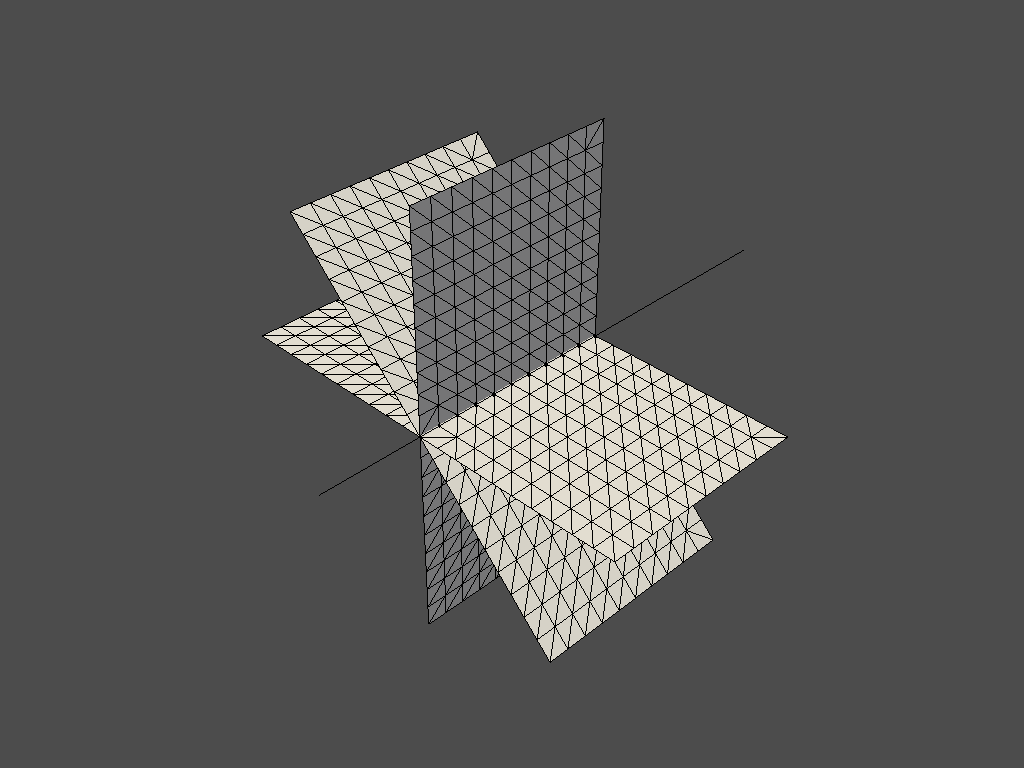

In [61]:
surf=toPyVista(X,T)
for i in range (1,8):
    surf+=toPyVista(X@rotZ(i*3.0/4.0*pi),T)

surf.plot(show_edges=True)
surf.save("multi.vtk")

## Cilindro conforme Hollow Fiber

In [62]:
#este es el ángulo para hace un lado de malla de cilindro ~=0.1
import numpy as np
def F(x):
    return (100*np.sin(x)*np.sin(x)+100-200*np.cos(x)+100*np.cos(x)*np.cos(x)-0.1)
import scipy.optimize
x = scipy.optimize.broyden1(F, [0.5], f_tol=1e-11)

(2*np.pi/x)%8   # entonces 6 * 8 =48 triángulos para dar la vuelta al cilindro => 2*pi/48 es el ángulo
#entonces 48*11=528 nodos

array([6.68348591])

In [63]:
from numpy import *
X=zeros([11*48,3])

num=0
for j in range(0,11):
    for i in range(0,48):
        th = i*2*pi/48
        x, y, z = j, 10*cos(th), 10*sin(th)
        X[num]=[x,y,z]
        num+=1
X

array([[ 0.        , 10.        ,  0.        ],
       [ 0.        ,  9.91444861,  1.30526192],
       [ 0.        ,  9.65925826,  2.58819045],
       ...,
       [10.        ,  9.23879533, -3.82683432],
       [10.        ,  9.65925826, -2.58819045],
       [10.        ,  9.91444861, -1.30526192]])

<IPython.core.display.Javascript object>


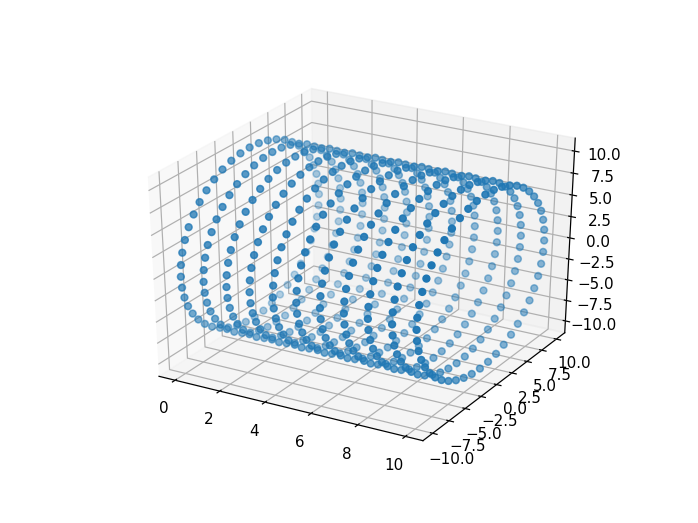

In [64]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0],X[:,1],X[:,2], 'gray')

In [65]:
Nz=11
Nt=48
nElem = 2*(Nz-1)*Nt;
T= zeros([nElem,3])                          # matriz para de conectividad cada fila tiene los tres nodos de un elemento


In [66]:
e=0;                                         # índice del elemento
for k in range(0, (Nz-1)):                   # para cada anillo excepto el último
    for i in range(0,Nt-1):                # para cada nodo del anillo
        ii= (k)*Nt+i                     # el índice del nodo en la lista global de nodos
        T[e,:]=[ii, ii+1, Nt+ii+1]       # construye el elemento
        e+=1                             # paso al siguiente elemento
        
        T[e,:] = [ii, Nt+ii+1, Nt+ii]
        e = e+1
       
    T[e,:]= [(k+1)*Nt-1, k*Nt, (k+1)*Nt]
    e+=1                                 # paso al siguinte elemento
    
    T[e,:]=[(k+1)*Nt-1,  (k+1)*Nt,  (k+2)*Nt-1]
    e+=1

In [67]:
b = zeros((960,4))
b[:,1:4]=T
b[:,0]=3*ones([960], dtype=int)
faces=hstack(b)


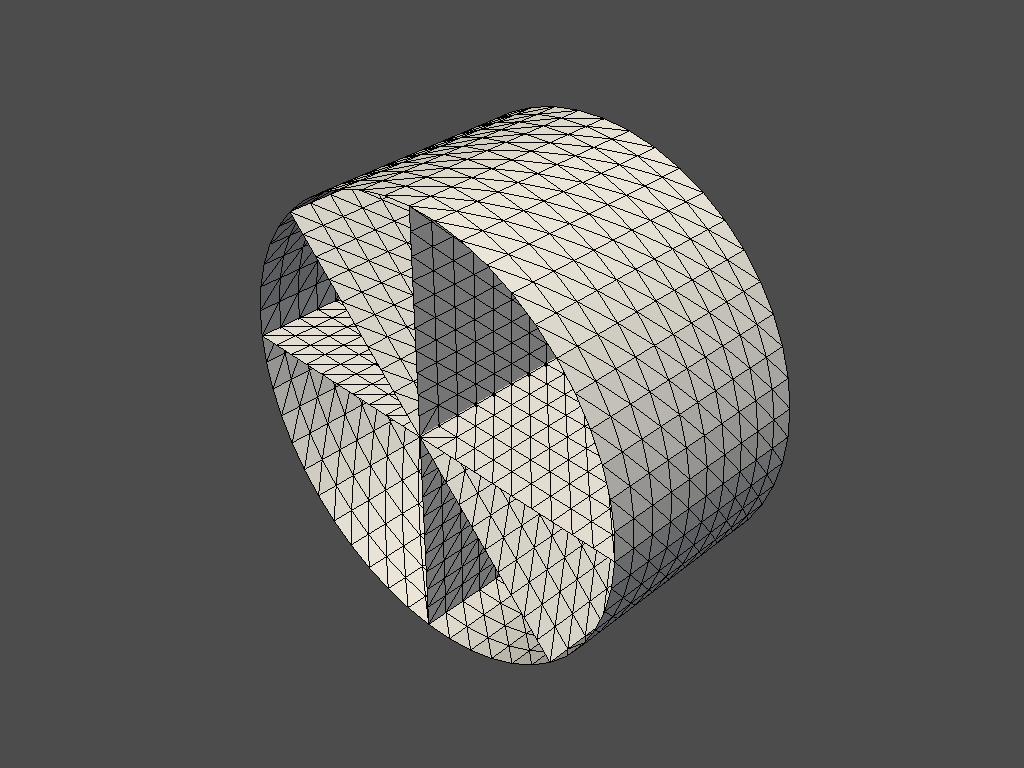

In [69]:
import pyvista as pv
from itkwidgets import view



surf2 = pv.PolyData(X,faces)+surf
surf2.plot(show_edges=True)
surf2.save("hollow_fiver.vtk")

## Más transformaciones

In [41]:
L0 = -0.5 * h                                  # para que el cilindro quede centrado

X = zeros([Nt*Nz,3])

ptId = 0
for i in range(0, Nz):                         # para cada anillo
    for j in range(0, Nt):                     # para cada punto del anillo
        theta = dt * (j + 0.5*mod(i,2))
        X[ptId,0] = R * cos(theta)
        X[ptId,1] = R * sin(theta)
        X[ptId,2] = (i*dz) + L0 
        ptId = ptId+1

NameError: name 'h' is not defined

<IPython.core.display.Javascript object>


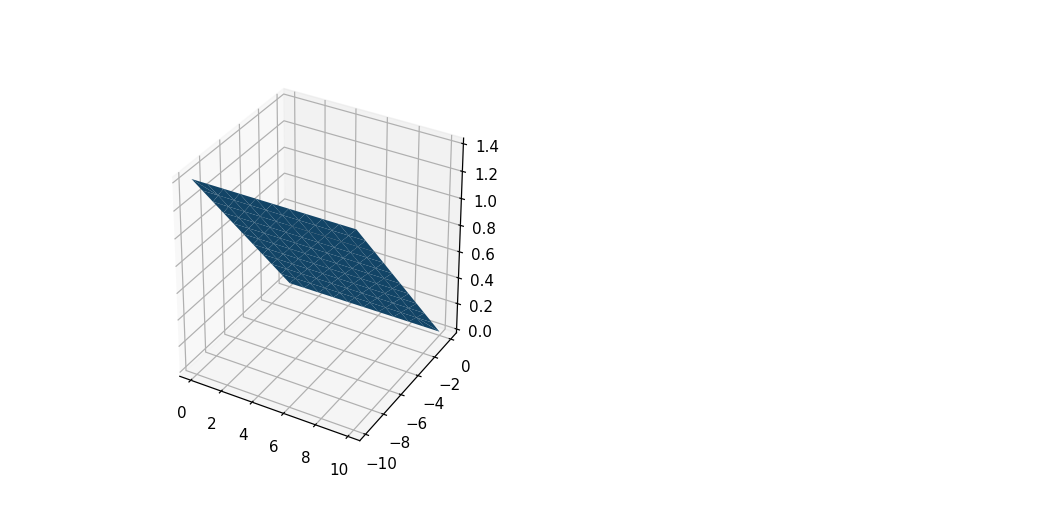

In [34]:
th=-3
rot=array([                         # matriz de rotación
    [1,0,0],
    [0, cos(th), -sin(th)],
    [0, sin(th), cos(th)]
])
points=X@rot                        # matriz de puntos rotada

writeVtk(points, T, 'basico2')
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=T)


## Transformación Bending

In [6]:
import numpy as np

def bending(X ,A=1,B=1,C=0.5):
    X1, X2, X3=X[:,0], X[:,1], X[:,2]
    r=np.sqrt(2*A*X1)
    theta=B*X2
    #z=X3/(A*B)-B*C*X2
    
    X_=X.copy()              # si uso X_=X crea una referencia!!!
    X_[:,0]=r*np.cos(theta)
    X_[:,1]=r*np.sin(theta)
    
    return X_

<IPython.core.display.Javascript object>


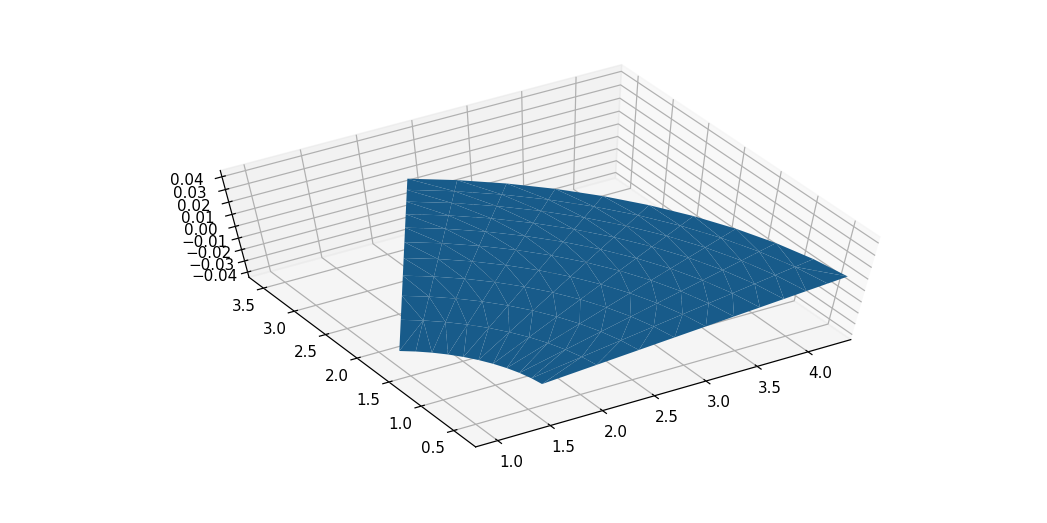

In [21]:
X,T= malla(1,10,11,1,10,11, _3D=True)
points= bending(X, 1, 0.1, 1)
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1,1, 1, projection='3d')
ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=T)
